## Ананьев Роман

# Лабораторная работа №3
### Компьютерное моделирование выборок непрерывных случайных величин, первичная обработка выборки
 

In [6]:
import numpy as np
import scipy.special as sc
import scipy.stats as sts
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

# Задание 1
 <!-- 1) Используя метод обратных функций, сформируйте
выборку объёма N = (100 + длина вашей фамилии) случайной величины
X , распределенной по показательному закону с параметром 𝜆 = 0,1 ∙
(длину вашего имени). В одной системе координат постройте график
эмпирической функции распределения, а также теоретической функции
распределения случайной величины X . Прокомментируйте получен-
ные рисунки.
2) Рассчитайте число интервалов группировки по различным пра-
вилам (квадратного корня, Райса, Стерджесса, Скотта и Фридмана –
Диакониса). Для каждого случая оцените качество представления теоре-
тической плотности распределения гистограммой (в качестве показате-
ля оценки возьмите максимальное по модулю отклонение гистограммы
8
от теоретической плотности). Для какого правила получился лучший по
точности результат? Расставьте правила «по рейтингу» точности. Сге-
нерируйте несколько новых выборок и повторите расчеты. Можно ли
сказать, что рейтинг устойчив? -->

`Задание 1.1`

In [7]:
print(f"N={100 + len('Ананьев')}")
print(f"λ={0.1*len('Роман')}")

N=107
λ=0.5


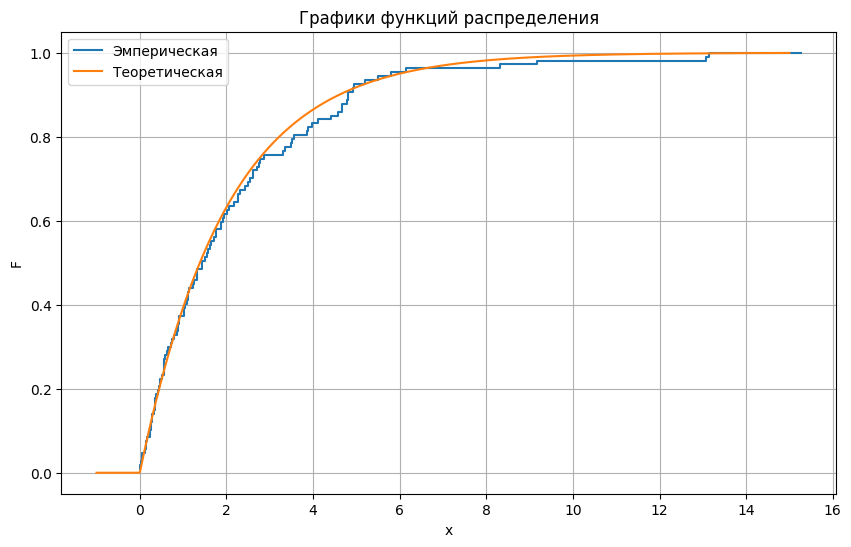

In [8]:
N = 107
lamb = 0.5

U = np.random.uniform(0, 1, N)
X = -np.log(U) / lamb
ecdf = ECDF(X)

plt.figure(figsize=(10, 6))
plt.step(ecdf.x, ecdf.y,label='Эмперическая')
xx = np.linspace(-1, 15, 1000)
F_xx = sts.expon(0, 1/lamb).cdf(xx)
plt.plot(xx, F_xx, label='Теоретическая')
plt.title(f"Графики функций распределения")
plt.xlabel('x')
plt.ylabel('F')
plt.legend()
plt.grid()
#график показывает близость эмпирической функции распределения к теоретической, 
#что подтверждает корректность генерации выборки.
#При увеличении N сходимость будет более явной (теорема Гливенко).

`Задание 1.2`

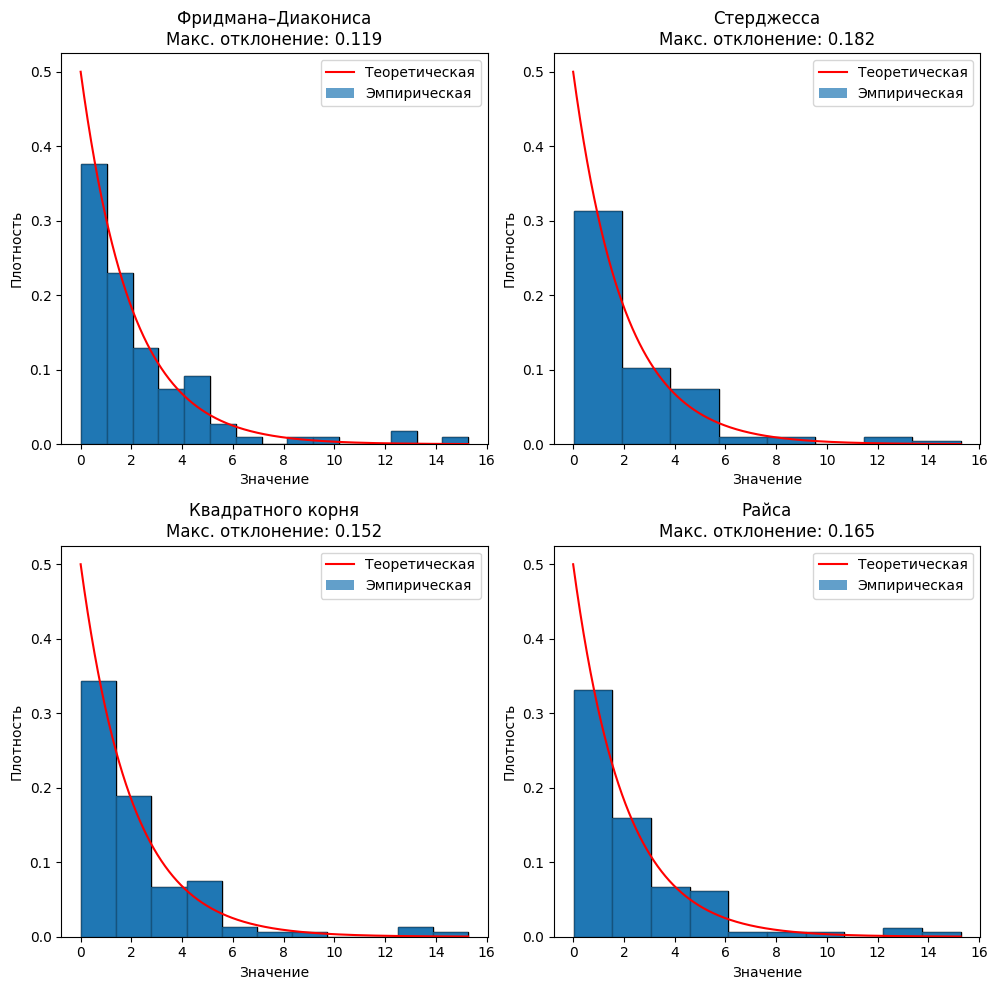

Рейтинг:
1. Фридмана–Диакониса: 0.119
2. Квадратного корня: 0.152
3. Райса: 0.165
4. Стерджесса: 0.182


In [9]:
lambda_param = 0.5 
def teor_pdf(x):
    return lambda_param * np.exp(-lambda_param * x)

plt.figure(figsize=(10, 10))
c = 1

rules = [
    ('fd', 'Фридмана–Диакониса'),
    ('sturges', 'Стерджесса'),
    ('sqrt', 'Квадратного корня'),
    ('rice', 'Райса')
]

# Хранение максимальных отклонений
deviations = {}

c = 1
for bin_rule, rule_name in rules:
    plt.subplot(2, 2, c)
    
    counts, bins, _ = plt.hist(X, bins=bin_rule, edgecolor='black', density=True)
    
    bin_widths = np.diff(bins)
    
    # Эмпирическая плотность 
    empirical_density = counts
    
    # Для каждой точки выборки находим её интервал и отклонение
    max_deviation = 0
    for x in X:
        # Находим интервал, в который попала точка
        bin_index = np.searchsorted(bins, x) - 1
        if bin_index < 0 or bin_index >= len(empirical_density):
            continue  # Если точка выходит за пределы гистограммы, пропускаем
        
        # Теоретическая плотность в точке
        teor_density_point = teor_pdf(x)
        
        # Эмпирическая плотность на интервале
        empir_density_interval = empirical_density[bin_index]
        
        # Отклонение
        deviation = np.abs(teor_density_point - empir_density_interval)
        if deviation > max_deviation:
            max_deviation = deviation
    
    deviations[rule_name] = max_deviation
    
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.bar(bin_centers, empirical_density, width=bin_widths, align='center', alpha=0.7, label='Эмпирическая')
    xx = np.linspace(0, max(X), 1000)
    plt.plot(xx, teor_pdf(xx), 'r-', label='Теоретическая')
    
    plt.title(f'{rule_name}\nМакс. отклонение: {max_deviation:.3f}')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.legend()
    c += 1

plt.tight_layout()
plt.show()

# Рейтинг правил
print("Рейтинг:")
for idx, (rule, dev) in enumerate(sorted(deviations.items(), key=lambda x: x[1]), 1):
    print(f"{idx}. {rule}: {dev:.3f}")

`Проверка устойчивости`

In [10]:
# Параметры
N = 107
lambda_param = 0.5 


def teor_pdf(x):
    return lambda_param * np.exp(-lambda_param * x)

rules = [
    ('fd', 'Фридмана–Диакониса'),
    ('sturges', 'Стерджесса'),
    ('sqrt', 'Квадратного корня'),
    ('rice', 'Райса')
]

# функция для вычисления максимального отклонения
def calculate_max_deviation(X, bin_rule):
    counts, bins = np.histogram(X, bins=bin_rule, density=True)
    bin_widths = np.diff(bins)
    empirical_density = counts
    
    max_deviation = 0
    for x in X:
        bin_index = np.searchsorted(bins, x) - 1
        if bin_index < 0 or bin_index >= len(empirical_density):
            continue
        
        teor_density_point = teor_pdf(x)
        empir_density_interval = empirical_density[bin_index]
        deviation = np.abs(teor_density_point - empir_density_interval)
        if deviation > max_deviation:
            max_deviation = deviation
    
    return max_deviation

# генерация пяти выборок и расчет отклонений
for samp_num in range(1, 6):
    print(f"Выборка {samp_num}:")
    U = np.random.uniform(0, 1, N)
    X = -np.log(U) / lambda_param
    
    deviations = {}
    for bin_rule, rule_name in rules:
        max_deviation = calculate_max_deviation(X, bin_rule)
        deviations[rule_name] = max_deviation
    
        #результат
    print("Максимальные отклонения:")
    for rule, dev in deviations.items():
        print(f"{rule}: {dev:.3f}")
    print("\n" + "=" * 40 + "\n")
    
#Результаты нельзя назвать устойчивыми

Выборка 1:
Максимальные отклонения:
Фридмана–Диакониса: 0.262
Стерджесса: 0.174
Квадратного корня: 0.216
Райса: 0.208


Выборка 2:
Максимальные отклонения:
Фридмана–Диакониса: 0.146
Стерджесса: 0.156
Квадратного корня: 0.154
Райса: 0.162


Выборка 3:
Максимальные отклонения:
Фридмана–Диакониса: 0.117
Стерджесса: 0.117
Квадратного корня: 0.133
Райса: 0.137


Выборка 4:
Максимальные отклонения:
Фридмана–Диакониса: 0.106
Стерджесса: 0.125
Квадратного корня: 0.109
Райса: 0.106


Выборка 5:
Максимальные отклонения:
Фридмана–Диакониса: 0.145
Стерджесса: 0.129
Квадратного корня: 0.093
Райса: 0.129




# Задание 2
<!-- Задание выполняется по вариантам. Пусть 𝑋 , 𝑋 , 𝑋 , … –
независимые случайные величины, распределенные по тому же закону,
что и случайная величина X из вашего варианта.
Вариант 2. X имеет распределение Фишера с параметрами 6,
58. -->

## Вариант 2

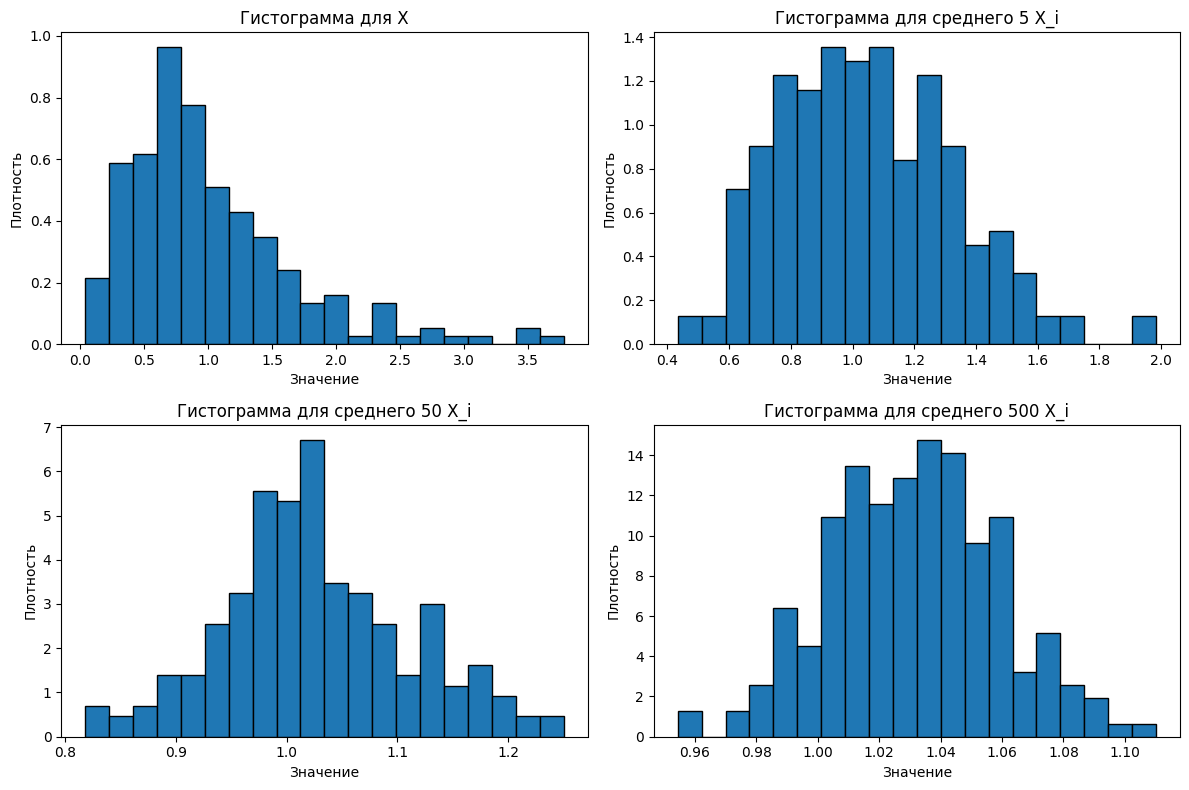

In [11]:
# Параметры распределения Фишера
df1, df2 = 6, 58  # Степени свободы

# Размер выборки
samp_size = 200

# Генерация выборок
X_samps = sts.f(df1, df2).rvs(size=samp_size)  
mean_5_samps = np.mean(sts.f(df1, df2).rvs(size=(5, samp_size)), axis=0)  # Среднее 5 X_i
mean_50_samps = np.mean(sts.f(df1, df2).rvs(size=(50, samp_size)), axis=0)  # Среднее 50 X_i
mean_500_samps = np.mean(sts.f(df1, df2).rvs(size=(500, samp_size)), axis=0)  # Среднее 500 X_i

# Список выборок и их названий
samps = [X_samps, mean_5_samps, mean_50_samps, mean_500_samps]
titles = ['Гистограмма для X', 
          'Гистограмма для среднего 5 X_i', 
          'Гистограмма для среднего 50 X_i', 
          'Гистограмма для среднего 500 X_i']

plt.figure(figsize=(12, 8))

for i, (samp, title) in enumerate(zip(samps, titles), 1):
    plt.subplot(2, 2, i)
    plt.hist(samp, bins=20, edgecolor='black', density=True)
    plt.title(title)
    plt.xlabel('Значение')
    plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

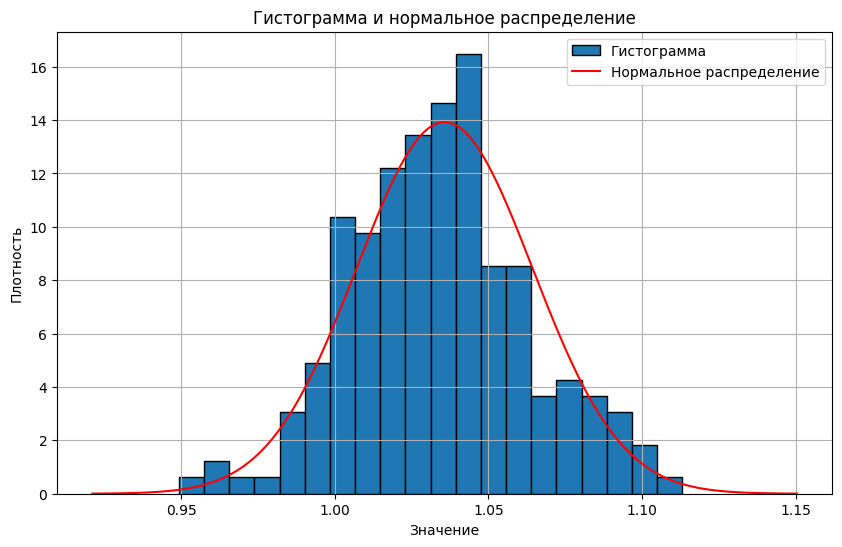

In [12]:
df1, df2 = 6, 58  
samp_size = 200
mean_500_samps = np.mean(sts.f(df1, df2).rvs(size=(500, samp_size)), axis=0)

# Теоретическое среднее и дисперсия для X
M_X = df2 / (df2 - 2)  # Математическое ожидание
Disp_X = (2 * df2**2 * (df1 + df2 - 2)) / (df1 * (df2 - 2)**2 * (df2 - 4))  # Дисперсия

mu = M_X  # Среднее
sigma = np.sqrt(Disp_X / 500)  # Стандартное отклонение

plt.figure(figsize=(10, 6))

plt.hist(mean_500_samps, bins=20, edgecolor='black', density=True, label='Гистограмма')


x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)  
plt.plot(x, sts.norm.pdf(x, mu, sigma), 'r-', label='Нормальное распределение')

plt.title('Гистограмма и нормальное распределение')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

#### по центральной предельной теореме, сумма 500 независимых величин приближается к нормальному распределению